In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 


In [2]:
df=pd.read_csv("bbc_news_dataset.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB
None


In [3]:
X=df['Text']
y=df['Category']

In [4]:
category_names=df['Category'].unique()
print(category_names)

['business' 'tech' 'politics' 'sport' 'entertainment']


In [5]:
#task:find freq in category
value_counts=df['Category'].value_counts()
print(value_counts)

Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64


In [6]:
value_counts.count

<bound method Series.count of Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64>

Text(0.5, 1.0, 'Categories')

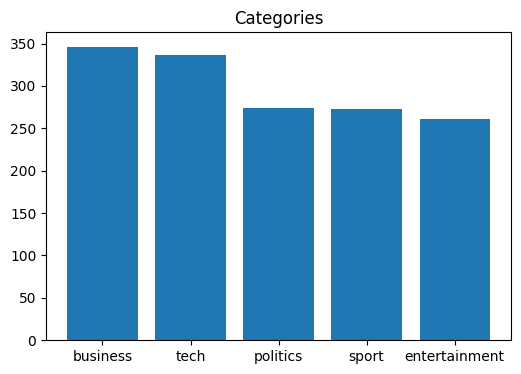

In [7]:
plt.figure(figsize=(6,4))
plt.bar(x=category_names,height=value_counts)
plt.title("Categories")

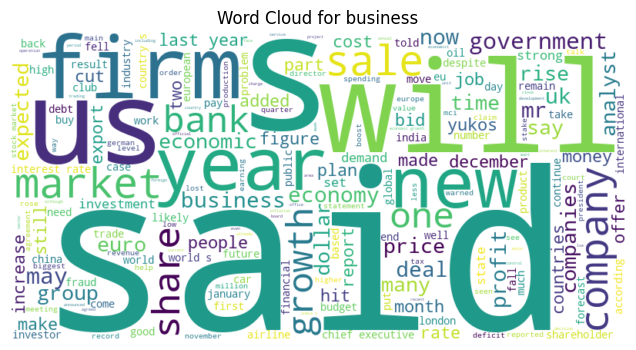

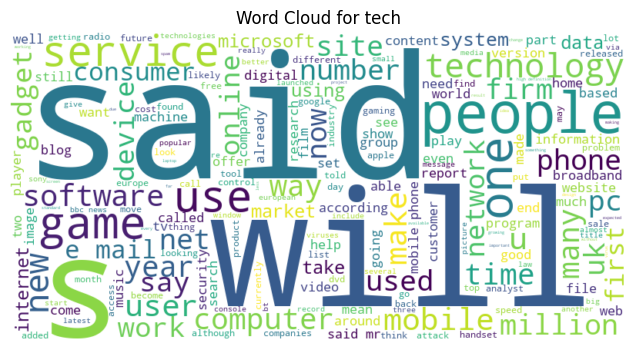

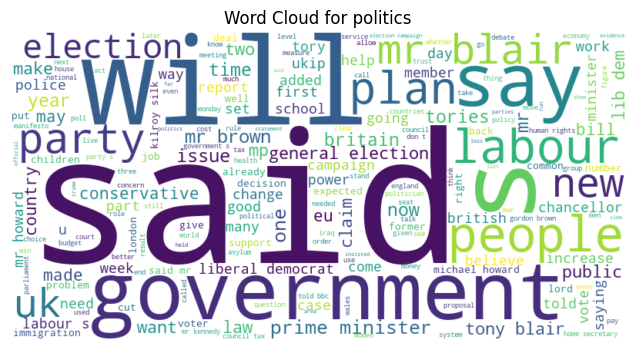

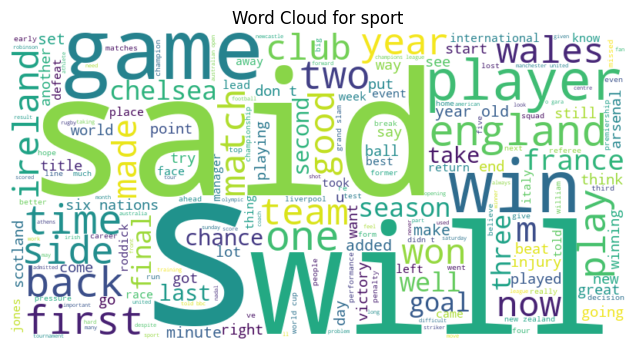

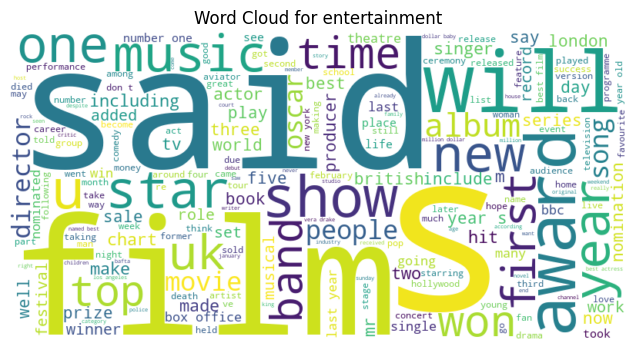

In [9]:
from wordcloud import WordCloud
for category in category_names:
    text=" ".join(df[df['Category']==category]['Text'].values)
    wordcloud= WordCloud(
        width=800,height=400,background_color='white'
    ).generate(text)
    plt.figure(figsize=(8,4))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.title(f"Word Cloud for {category}")
    plt.axis('off')
    plt.savefig(f"Word Cloud for {category}.png")
    plt.show()

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1192,)
(1192,)
(298,)
(298,)


In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import  MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score , classification_report 
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay


In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
nb_model= make_pipeline(TfidfVectorizer(stop_words='english'),MultinomialNB())
nb_model.fit(X_train,y_train)
y_preds=nb_model.predict(X_test)
print(f'Accuracy={accuracy_score(y_test,y_preds)*100:.3f}')
print(f'Classification Report\n {classification_report(y_test,y_preds)}')

Accuracy=95.638
Classification Report
                precision    recall  f1-score   support

     business       0.94      0.97      0.95        75
entertainment       1.00      0.96      0.98        46
     politics       0.91      0.95      0.93        56
        sport       0.97      1.00      0.98        63
         tech       0.98      0.90      0.94        58

     accuracy                           0.96       298
    macro avg       0.96      0.95      0.96       298
 weighted avg       0.96      0.96      0.96       298



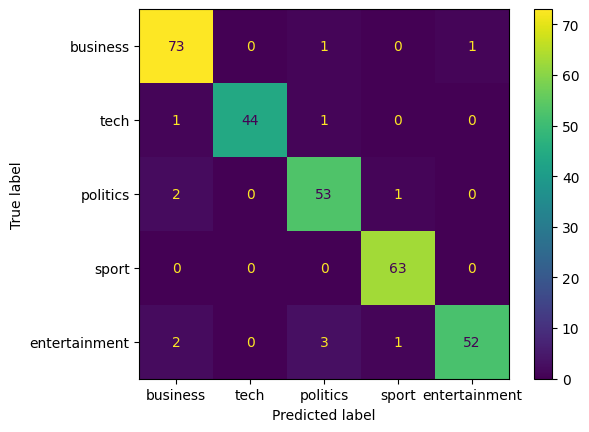

In [14]:
cm=confusion_matrix(y_test,y_preds)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df['Category'].unique())
cm_plot.plot()
plt.savefig("cm.png")
plt.show()

In [15]:
text = [
    'Manchester United won against Chelsa by 3-0',
    'The government plans to support Ukrain against Russia for the looming threat '
]
predictions=nb_model.predict(text)
for text , prediction in zip(text,predictions):
    print(f'Text: {text}\n Predicted Category : {prediction}')

Text: Manchester United won against Chelsa by 3-0
 Predicted Category : sport
Text: The government plans to support Ukrain against Russia for the looming threat 
 Predicted Category : politics


In [16]:
import joblib
joblib.dump(nb_model, 'model.joblib')
print('SUCCESS')

SUCCESS


import torch

print(torch.__version__)

if torch.cuds.is_available():

   device='cuda'

elif torch.backhends.mps.is_available():

   device='mps'

else 

  device='cpu'
  
print(f"using device)
